In [1]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.special as sc

In [2]:
def p_ss_atma(p_res_atma = 250,
              q_liq_sm3day = 20,
              mu_cP = 1,
              B_m3m3 = 1.2,
              k_mD = 10,
              h_m = 10,
              r_e = 240,
              r = 0.1):
  """
  функция расчета давления в произвольной точке пласта для стационарного решения 
  уравнения фильтрации 
  p_res_atma - пластовое давление, давление на контуре питания
  q_liq_sm3day - дебит жидкости на поверхности в стандартных условиях
  mu_cP - вязкость нефти (в пластовых условиях)
  B_m3m3 - объемный коэффициент нефти 
  k_mD - проницаемость пласта
  h_m - мощность пласта
  r_e - радиус контрура питания 
  r - расстояние на котором проводится расчет
  """
  return p_res_atma - 18.41 * q_liq_sm3day*mu_cP*B_m3m3/k_mD/h_m * np.log(r_e/r)


In [3]:
# определим функции для перевода размерных переменных в безразмерные и обратно
# пригодится потом для построения графиков и ведения расчетов

# при наименовании функций придерживаемся следующих соглашений
# сначала идет название того, что считаем
# в конце указывается размерность результата, если это уместно

def r_from_rd_m(rd, rw_m=0.1):
    """
    перевод безразмерного расстояния в размерное
    rd -  безразмерное расстояние
    rw_m -  радиус скважины, м
    """
    return rd*rw_m

def rd_from_r(r_m, rw_m=0.1):
    """
    перевод размерного расстояния в безразмерное
    r_m - размерное расстояние, м
    rw_m - радиус скважины, м
    """
    return r_m/rw_m

def t_from_td_hr(td, k_mD=10, phi=0.2, mu_cP=1, ct_1atm=1e-5, rw_m=0.1):
    """
    перевод безразмерного времени в размерное, результат в часах
    td - безразмерное время
    k_mD - проницаемость пласта, мД
    phi - пористость, доли единиц
    mu_cP - динамическая вязкость флюида, сП
    ct_1atm - общая сжимаемость, 1/атм
    rw_m - радиус скважины, м
    """
    return td * phi * mu_cP * ct_1atm * rw_m * rw_m / k_mD / 0.00036

def td_from_t(t_hr, k_mD=10, phi=0.2, mu_cP=1, ct_1atm=1e-5, rw_m=0.1):
    """
    перевод размерного времени в безразмерное
    t_hr - размерное время, час
    k_mD - проницаемость пласта, мД
    phi - пористость, доли единиц
    mu_cP - динамическая вязкость флюида, сП
    ct_1atm - общая сжимаемость, 1/атм
    rw_m - радиус скважины, м
    """
    return  0.00036 * t_hr * k_mD / (phi * mu_cP * ct_1atm * rw_m * rw_m) 

def p_from_pd_atma(pd, k_mD=10, h_m=10, q_sm3day=20, b_m3m3=1.2, mu_cP=1, pi_atma=250):
    """
    перевод безразмерного давления в размерное, результат в абсолютных атмосферах
    pd - безразмерное давление
    k_mD - проницаемость пласта, мД
    h_m - мощность пласта, м
    q_sm3day - дебит на поверхности, м3/сут в с.у.
    fvf_m3m3 - объемный коэффициент нефти, м3/м3
    mu_cP - динамическая вязкость флюида, сП
    pi_atma - начальное давление, абсолютные атм.
    """
    return pi_atma - pd * 18.41 * q_sm3day * b_m3m3 * mu_cP / k_mD / h_m 

def pd_from_p(p_atma, k_mD=10, h_m=10, q_sm3day=20, b_m3m3=1.2, mu_cP=1, pi_atma=250):
    """
    перевод размерного давления в безразмерное
    p_atma - давление
    k_mD - проницаемость пласта, мД
    h_m - мощность пласта, м
    q_sm3day - дебит на поверхности, м3/сут в с.у.
    fvf_m3m3 - объемный коэффициент нефти, м3/м3
    mu_cP - динамическая вязкость флюида, сП
    pi_atma - начальное давление, абсолютные атм.
    """
    return (pi_atma - p_atma) / (18.41 * q_sm3day * b_m3m3 * mu_cP) * k_mD * h_m 

# Решение линейного стока уравнения фильтрации
def pd_ei(td, rd):
    """
    Решение линейного стока уравнения фильтрации
    rd - безразмерное расстояние
    td - безразмерное время
    """
    return -1/2*sc.expi(-rd**2 / 4 / td)

In [17]:
td = 14000
rd_ss = 1
rdl = np.logspace(-1, 3 , 100)

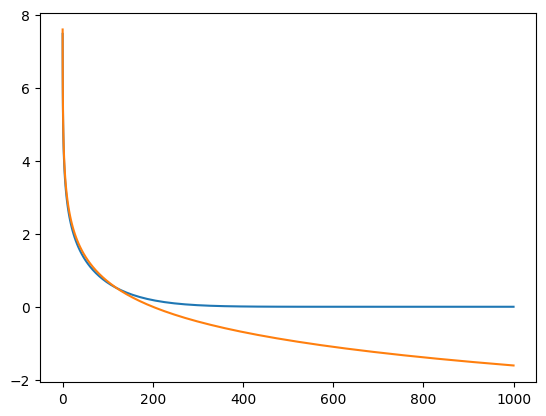

In [20]:
plt.plot(rdl, pd_ei(td, rdl))
plt.plot(rdl, np.log(200)-np.log(rdl))

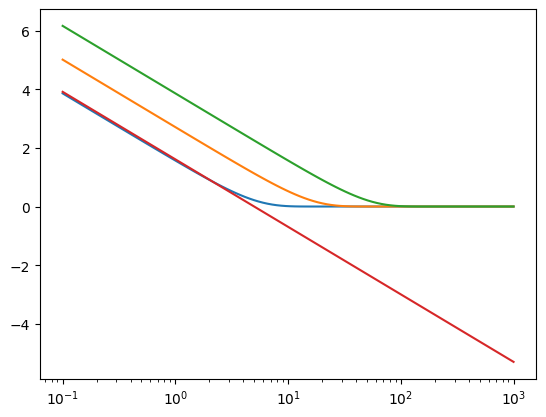

In [9]:
for td in [10, 100, 1000]:
    plt.plot(rdl, pd_ei(td, rdl))
plt.plot(rdl, np.log(5)-np.log(rdl))
plt.xscale('log')

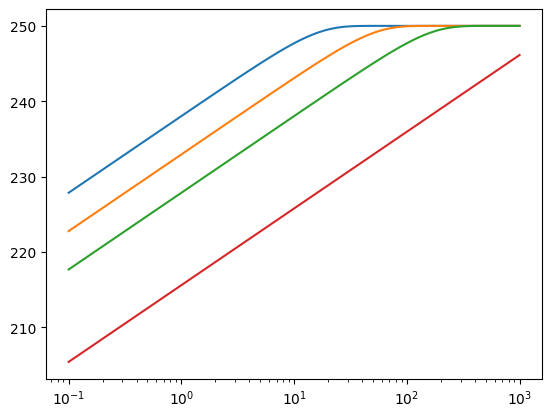

In [10]:
for td in [100, 1000, 10000]:
    plt.plot(rdl, p_from_pd_atma( pd_ei(td, rdl)) )
plt.plot(rdl, p_ss_atma(r=r_from_rd_m(rdl)))
plt.xscale('log')

вопрос - как будет выглядеть решение для постоянного забойного давления

